In [13]:
# **Part 1: Install dan Import Library yang Diperlukan**
!pip install mglearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import mglearn

In [14]:
# **Part 2: Load Dataset**
from google.colab import files
uploaded = files.upload()

Saving Automobile.csv to Automobile (2).csv


In [7]:
# Menghapus data yang memiliki nilai NaN
df = pd.read_csv('Automobile.csv')
print(df.head())

     price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  wheel-base engine-location  \
0    2.68  3.47        mpfi          130  ...        88.6           front   
1    2.68  3.47        mpfi          130  ...        88.6           front   
2    3.47  2.68        mpfi          152  ...        94.5           front   
3    3.40  3.19        mpfi          109  ...        99.8           front   
4    3.40  3.19        mpfi          136  ...        99.4           front   

   drive-wheels   body-style  num-of-doors  aspiration  fuel-type  \

In [15]:
# **Part 3: Menyiapkan Fitur dan Target**
X = df.select_dtypes(include=[np.number]).drop(columns=['symboling'])  # Semua fitur numerik kecuali target
y = df['symboling']

# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# **Part 4: Membuat dan Melatih Model**
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# **Part 5: Prediksi dan Evaluasi Model**
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 0.6035
Root Mean Squared Error (RMSE): 0.7769
R-squared (R2): 0.5888


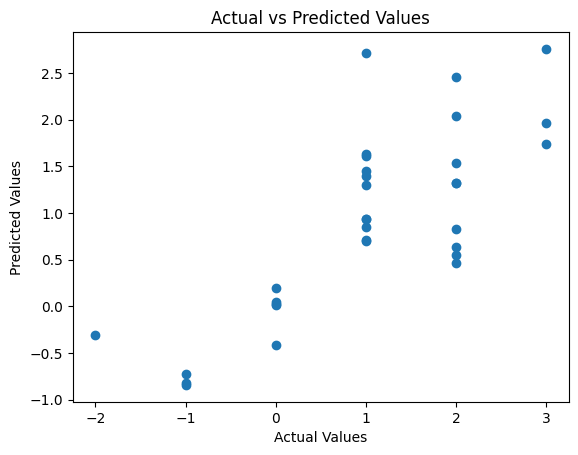

In [12]:
# **Part 6: Visualisasi Hasil Prediksi vs Aktual**
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# **Part 7: Penjelasan Matematis**
# 1. Mean Squared Error (MSE):
#    - Rumus: MSE = (1/n) * Σ(y_actual - y_predicted)^2
#    - MSE mengukur rata-rata kuadrat kesalahan antara nilai aktual dan prediksi.
#    - Nilai MSE yang lebih kecil menunjukkan bahwa model lebih akurat.
#
# 2. Root Mean Squared Error (RMSE):
#    - Rumus: RMSE = sqrt(MSE)
#    - RMSE adalah akar dari MSE, memberikan kesalahan dalam satuan yang sama dengan target.
#    - Digunakan untuk memahami besarnya kesalahan model dalam prediksi.
#
# 3. R-squared (R²):
#    - Rumus: R² = 1 - (SS_residual / SS_total)
#    - SS_residual = Σ(y_actual - y_predicted)^2
#    - SS_total = Σ(y_actual - mean(y_actual))^2
#    - R² menunjukkan seberapa baik variabel independen menjelaskan variabilitas target.
#    - Nilai R² berkisar antara 0 hingga 1, semakin mendekati 1 semakin baik model menjelaskan data.
